In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D
from keras import regularizers
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
X_train = train.drop('label',axis=1)
Y_train = train['label']

In [4]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
X_train = X_train/255.0
test = test/255.0

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
Y_train = to_categorical(Y_train,10)

In [9]:
random_seed = 42

In [10]:
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed)

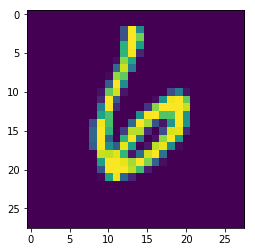

In [11]:
g = plt.imshow(X_train[0][:,:,0])

In [12]:
### Model -> [[Conv->Relu(L2)]*2->MaxPool]*2->Flatten->Dense->L2->Output
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),strides=1,padding='Same',input_shape=[28,28,1],kernel_initializer='glorot_uniform', 
                 bias_initializer='zeros',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=1,padding='Same',kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(5,5),strides=1,padding='Same',kernel_initializer='glorot_uniform', 
                 bias_initializer='zeros',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(filters=64,kernel_size=(5,5),strides=1,padding='Same',kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1, factor=0.5,min_lr=0.00001)

In [15]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=[0.9,1.1],
                            horizontal_flip=False,
                            vertical_flip=False)
datagen.fit(X_train)

In [16]:
epochs = 20
batch_size = 32

In [17]:
model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs,steps_per_epoch=(X_train.shape[0]/batch_size),
                   validation_data=(X_cv,Y_cv),callbacks=[learning_rate_reduction])

Epoch 1/10
1050/1050 [==============================] - 564s 537ms/step - loss: 0.8024 - acc: 0.8897 - val_loss: 0.4062 - val_acc: 0.9618
Epoch 2/10
1050/1050 [==============================] - 561s 534ms/step - loss: 0.4525 - acc: 0.9407 - val_loss: 0.3237 - val_acc: 0.9742
Epoch 3/10
1050/1050 [==============================] - 550s 524ms/step - loss: 0.4067 - acc: 0.9463 - val_loss: 0.3164 - val_acc: 0.9705
Epoch 4/10
1050/1050 [==============================] - 563s 536ms/step - loss: 0.3762 - acc: 0.9500 - val_loss: 0.2960 - val_acc: 0.9736
Epoch 5/10
1049/1050 [============================>.] - ETA: 0s - loss: 0.3559 - acc: 0.9544
Epoch 00005: reducing learning rate to 0.0005000000237487257.
1050/1050 [==============================] - 581s 554ms/step - loss: 0.3559 - acc: 0.9544 - val_loss: 0.2827 - val_acc: 0.9723
Epoch 6/10
1050/1050 [==============================] - 571s 543ms/step - loss: 0.2943 - acc: 0.9624 - val_loss: 0.2447 - val_acc: 0.9732
Epoch 7/10
1049/1050 [======

In [18]:
Y_pred = model.predict(X_cv)
Y_pred_digit = np.argmax(Y_pred,axis=1)
Y_true = np.argmax(Y_cv,axis=1)
confusion_matrix(Y_true,Y_pred_digit)

array([[811,   0,   0,   0,   0,   0,   2,   0,   1,   2],
       [  0, 902,   4,   0,   0,   0,   1,   2,   0,   0],
       [  1,   3, 835,   1,   0,   0,   0,   3,   2,   1],
       [  0,   0,   3, 913,   0,   5,   0,   6,   6,   4],
       [  0,   1,   0,   0, 824,   0,   3,   2,   0,   9],
       [  1,   0,   0,   3,   0, 688,   5,   0,   2,   3],
       [  2,   0,   0,   0,   6,   0, 776,   0,   1,   0],
       [  0,   0,   5,   0,   0,   0,   0, 884,   1,   3],
       [  0,   3,   5,   0,   2,   1,   4,   2, 815,   3],
       [  0,   2,   1,   2,   3,   2,   0,   9,   2, 817]], dtype=int64)

In [19]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [20]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("digit_recognizer_data_augmentation.csv",index=False)